In [2]:
import sys; sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)

font = {'family':'serif'} 
plt.rc('font',**font)
from experiments import initial_mean_experiment

#### Experiment with same standard deviation for Normal, evaluate different init norms

I'll do a similar experiment as before with $\mu_0 \in \{0.2, 0.3, \ldots, 0.8\}$ in order to evaluate how that changes things. Hope to get the sort of plot in Figure 1 of Myers (1982) where shift increases as initial mean increases in extremity. However, we may see the same sort of binning noise found in the sweeps above for a smaller standard deviation. Standard deviation in the above experiments over distribution used extremity_factor * 0.25 as the mean.

In [3]:
extremity_factor = 3.5
stddev = extremity_factor * 0.25
means = extremity_factor * np.arange(start=.2, stop=.81, step=.1)
print(means)
norm_over_means = initial_mean_experiment(
    means=means, stddev=stddev, dist='normal', n_trials=100
)

[0.7  1.05 1.4  1.75 2.1  2.45 2.8 ]
Bound = 0.7000000000000001
Running trials for 0.700
Running trials for 1.050
Running trials for 1.400
Running trials for 1.750
Running trials for 2.100
Running trials for 2.450
Running trials for 2.800


In [4]:
means = list(norm_over_means.keys())
n_means = len(means)
shift_mean_at_dist_mean = np.zeros((n_means,), dtype=float)
shift_std_at_dist_mean = np.zeros((n_means,), dtype=float)


df = pd.DataFrame(columns=['InitialMean', 'Shift'])
for idx in range(n_means):
    

    current_mean = means[idx]
    results_for_mean = list(norm_over_means.values())[idx]['experiment_result']

    shifts = [el.shift for el in results_for_mean]
#     print(shifts)

    shift_mean_at_dist_mean[idx] = np.mean(shifts)
    shift_std_at_dist_mean[idx] = np.std(shifts)
    
    df_part = pd.DataFrame({
        'InitialMean': [current_mean] * len(shifts),
        'Shift': shifts
    })

    df = df.append(df_part)
    

Text(0.5, 1.0, 'n iter=100, n trials=100')

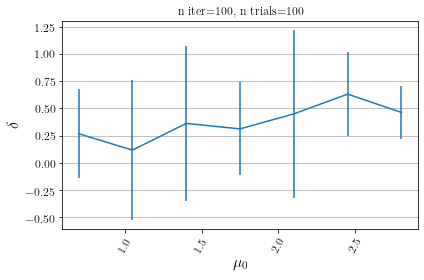

In [9]:
plt.errorbar(x=means, y=shift_mean_at_dist_mean, yerr=2*shift_std_at_dist_mean)
plt.xlabel(r'$\mu_0$', size=16)
plt.xticks(size=12, rotation=60)
plt.ylabel(r'$\delta$', size=16)
plt.yticks(size=12)
plt.grid(axis='y')
plt.title('n iter=100, n trials=100')

In [10]:
df.head()

,InitialMean,Shift
0,0.700,0.12
1,0.700,0.00
2,0.700,-0.40
3,0.700,-0.04
4,0.700,0.08


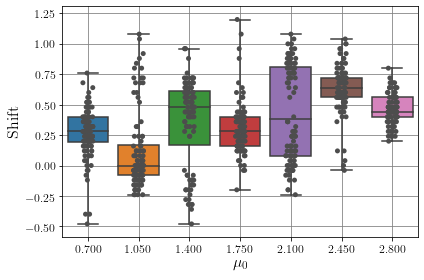

In [11]:
ax = sns.boxplot(x="InitialMean", y="Shift", data=df, whis=np.inf)
# ax = sns.boxplot(x="Distribution", y="Shift", data=df)
ax = sns.stripplot(x="InitialMean", y="Shift", data=df, jitter=True, color=".3")

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')
plt.xlabel('$\mu_0$', size=16)
plt.ylabel('Shift', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
# plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/ShiftVsDist.pdf')

One more experiment with this simple normally-distributed case: bound values less than zero to be zero. Introducing a `bound_zero` kwarg.

In [12]:
extremity_factor = 3.5
stddev = extremity_factor * 0.25
means = extremity_factor * np.arange(start=.2, stop=.81, step=.1)

norm_over_means = initial_mean_experiment(
    means=means, stddev=stddev, dist='normal', n_trials=100, bound_zero=True
)

Bound = 0.7000000000000001
Running trials for 0.700
Running trials for 1.050
Running trials for 1.400
Running trials for 1.750
Running trials for 2.100
Running trials for 2.450
Running trials for 2.800


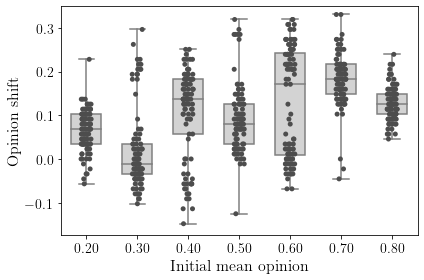

In [30]:
means = list(norm_over_means.keys())
n_means = len(means)

shift_mean_at_dist_mean = np.zeros((n_means,), dtype=float)
shift_std_at_dist_mean = np.zeros((n_means,), dtype=float)
cshift_mean_at_dist_mean = np.zeros((n_means,), dtype=float)
cshift_std_at_dist_mean = np.zeros((n_means,), dtype=float)

df = pd.DataFrame(columns=['InitialMean', 'Shift', 'CShift'])
for idx in range(n_means):
    
    current_mean = means[idx]
    results_for_mean = list(norm_over_means.values())[idx]['experiment_result']

    # 5/29: dividing by "extremity factor" to normalize for comparison to
    # continuous results.
    shifts = [el.shift/3.5 for el in results_for_mean]    
    contin_shifts = [el.contin_shift for el in results_for_mean]


    shift_mean_at_dist_mean[idx] = np.mean(shifts)
    shift_std_at_dist_mean[idx] = np.std(shifts)
    cshift_mean_at_dist_mean[idx] = np.mean(contin_shifts)
    cshift_std_at_dist_mean[idx] = np.std(contin_shifts)
    
    df_part = pd.DataFrame({
        'InitialMean': [current_mean] * len(shifts),
        'Shift': shifts,
        'CShift': contin_shifts
    })

    df = df.append(df_part)
    

plt.figure()

# ax = sns.boxplot(x="Distribution", y="Shift", data=df)

xlabel = 'Initial mean opinion'
ylabel = 'Opinion shift'

x = sns.boxplot(x="InitialMean", y="Shift", data=df, color='lightgray', 
                 width=0.6, whis=np.inf)

ax = sns.stripplot(x="InitialMean", y="Shift", data=df, jitter=True, color=".3")
ax.set_axisbelow(True)
# ax.yaxis.grid(color='gray')
# ax.xaxis.grid(color='gray')


plt.xlabel(xlabel, size=16)
plt.ylabel(ylabel, size=16)
plt.xticks(size=14)
# plt.yticks(np.arange(-0.4, 1.4, 0.2), size=14)
plt.ylim(-0.175, 0.35)
plt.yticks([-0.1, 0.0, 0.1, 0.2, 0.3], size=14)
ax.set_xticklabels([f'{(val/3.5):.2f}' for val in np.arange(0.7, 2.81, 0.350)])
# plt.title('7-point Likert', size=16)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/7pointLikertBoxplot.pdf')

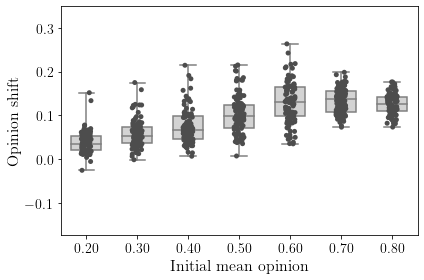

In [32]:
plt.figure()
ax = sns.boxplot(x="InitialMean", y="CShift", data=df, color='lightgray', 
                 width=0.6, whis=np.inf)
# ax = sns.boxplot(x="Distribution", y="Shift", data=df)
ax = sns.stripplot(x="InitialMean", y="CShift", data=df, jitter=True, color=".3")

ax.set_axisbelow(True)
# ax.yaxis.grid(color='gray')
# ax.xaxis.grid(color='gray')
plt.xlabel('Initial mean opinion', size=16)
plt.ylabel('Opinion shift', size=16)
plt.xticks(size=14)

# plt.yticks([0.0, 0.2], size=14)
plt.yticks(size=14)
from matplotlib.ticker import AutoMinorLocator
# ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.set_yticklabels(['', '0.1', '', ''], minor=True, size=14)
ax.set_xticklabels([f'{(val/3.5):.2f}' for val in np.arange(0.7, 2.81, 0.350)])
# plt.title('Continuous', size=16)
# plt.yticks(np.arange(-0.4, 1.4, 0.2), size=14)
plt.ylim(-0.175, 0.35)
plt.yticks([-0.1, 0.0, 0.1, 0.2, 0.3], size=14)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/ContinuousBoxplot.pdf')